## Imports

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

from matplotlib import cm
from matplotlib.lines import Line2D
import yaml
import time
import datetime
from IPython.display import display

try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper

pd.options.display.max_columns = 200

In [16]:
# Importing the dataset
df = pd.read_csv('dataset\\cla4lsp customers.csv', header=0)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,6/13/2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,6/10/2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,1/25/2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,1/24/2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


## Data wrangling and cleaning

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [18]:
# Removing the rows having null Income as there are only a few with respect to the whole dataset
df = df.dropna()
print(f"Total rows remaining: {len(df)}")

Total rows remaining: 2216


In [19]:
# We know that the following columns are not useful for us
df = df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)

In [20]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,6/13/2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,6/10/2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,1/25/2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,1/24/2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [21]:
# Checking for duplicates
df.duplicated().value_counts()

False    2034
True      182
Name: count, dtype: int64

In [22]:
df[df.duplicated()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
83,1963,Master,Together,38620.0,0,0,5/11/2013,56,112,17,44,34,22,89,1,2,5,3,3,0,0,0,0,0,0,0
179,1951,2n Cycle,Married,78497.0,0,0,12/1/2013,44,207,26,447,75,0,223,1,5,7,12,2,0,0,0,1,0,0,0
281,1976,Graduation,Together,51369.0,0,1,10/25/2012,84,297,7,79,0,11,182,2,8,2,4,8,0,0,0,0,0,0,0
282,1946,Graduation,Together,37760.0,0,0,8/31/2012,20,84,5,38,150,12,28,2,4,1,6,7,0,0,0,0,0,0,0
363,1978,PhD,Married,37717.0,1,0,11/23/2012,31,9,0,6,4,1,5,1,1,0,2,9,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,1978,Graduation,Together,22775.0,1,0,6/19/2013,40,5,1,8,0,0,1,1,1,0,2,8,0,0,0,0,0,0,0
2221,1982,Master,Single,75777.0,0,0,7/4/2013,12,712,26,538,69,13,80,1,3,6,11,1,0,1,1,0,0,0,1
2225,1968,Graduation,Together,58554.0,1,1,9/26/2012,55,368,24,68,38,0,88,6,8,2,6,7,0,0,0,0,0,0,0
2234,1974,Graduation,Married,34421.0,1,0,7/1/2013,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,0


In [23]:
df = df.drop_duplicates(keep="first")

Doing some feature engineering

In [24]:
df['Marital_Status'].value_counts()

Marital_Status
Married     788
Together    514
Single      439
Divorced    216
Widow        70
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [25]:
# Merge 'Alone' with 'Single'
Alone_index = df[df['Marital_Status'] == 'Alone'].index
for i in Alone_index:
    df.at[i, 'Marital_Status'] = 'Single'

# Remove 'Absurd' from the dataset
Absurd_index = df[df['Marital_Status'] == 'Absurd'].index
for i in Absurd_index:
    df = df.drop(i, axis=0)

# Remove 'YOLO' from the dataset
YOLO_index = df[df['Marital_Status'] == 'YOLO'].index
for i in YOLO_index:
    df = df.drop(i)

# Merge 'Together' with 'Married'
Together_index = df[df['Marital_Status'] == 'Together'].index
for i in Together_index:
    df.at[i, 'Marital_Status'] = 'Married'

# I change the name from 'Married' to 'Married-Together'
Married_index = df[df['Marital_Status'] == 'Married'].index
for i in Married_index:
    df.at[i, 'Marital_Status'] = 'Married-Together'

# I must reset the index now that I've eliminated some rows
df = df.reset_index(drop = True)

In [26]:
df['Marital_Status'].value_counts()

Marital_Status
Married-Together    1302
Single               442
Divorced             216
Widow                 70
Name: count, dtype: int64

In [27]:
# Adding the age feature
df['Age'] = 2024 - df['Year_Birth']

# Total spending
df["Tot_Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

# How many children at home
df["Tot_Children"] = df["Kidhome"] + df["Teenhome"]

# If the person has children
df["Is_Parent"] = np.where(df.Tot_Children> 0, 1, 0)


In [28]:
# Adding a feature to keep track of how many days a person has been customer for

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)


today = pd.to_datetime('2024-12-23').date()

tot_days = []
for d in dates:
    temp = today - d
    tot_days.append(temp.days)


df["Been_Customer_For"] = tot_days

In [29]:
# Remove some columns that are not useful anymore
df = df.drop(columns=['Year_Birth', 'Dt_Customer'])

In [30]:
# getting labels, features and spending habits
labels = ['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response', 'Recency']
features = [i for i in df.columns if i not in labels]

spending_habits = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

### Analysis

In [31]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tot_Spent,Tot_Children,Is_Parent,Been_Customer_For
count,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000
mean,52341.947291,0.443842,0.508374,48.885714,305.114778,26.258128,167.736946,37.316749,27.161576,43.653695,2.335468,4.097044,2.667488,5.781281,5.323645,0.074384,0.076355,0.071921,0.065025,0.012808,0.009852,0.152709,55.207389,607.241872,0.952217,0.719212,4182.111823
std,25543.169145,0.536080,0.546217,28.975759,337.632025,39.759570,226.862170,54.580985,41.517215,51.531840,1.933664,2.758015,2.935360,3.241921,2.436615,0.262460,0.265630,0.258421,0.246630,0.112473,0.098793,0.359796,11.971580,603.840178,0.745734,0.449495,202.439367
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,0.000000,3830.000000
25%,35461.500000,0.000000,0.000000,24.000000,23.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,69.000000,0.000000,0.000000,4008.000000
50%,51533.000000,0.000000,0.000000,49.000000,174.000000,8.000000,68.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,396.000000,1.000000,1.000000,4181.000000
75%,68480.750000,1.000000,1.000000,74.000000,506.500000,33.000000,230.000000,50.000000,33.750000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,1047.750000,1.000000,1.000000,4358.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000,2525.000000,3.000000,1.000000,4529.000000


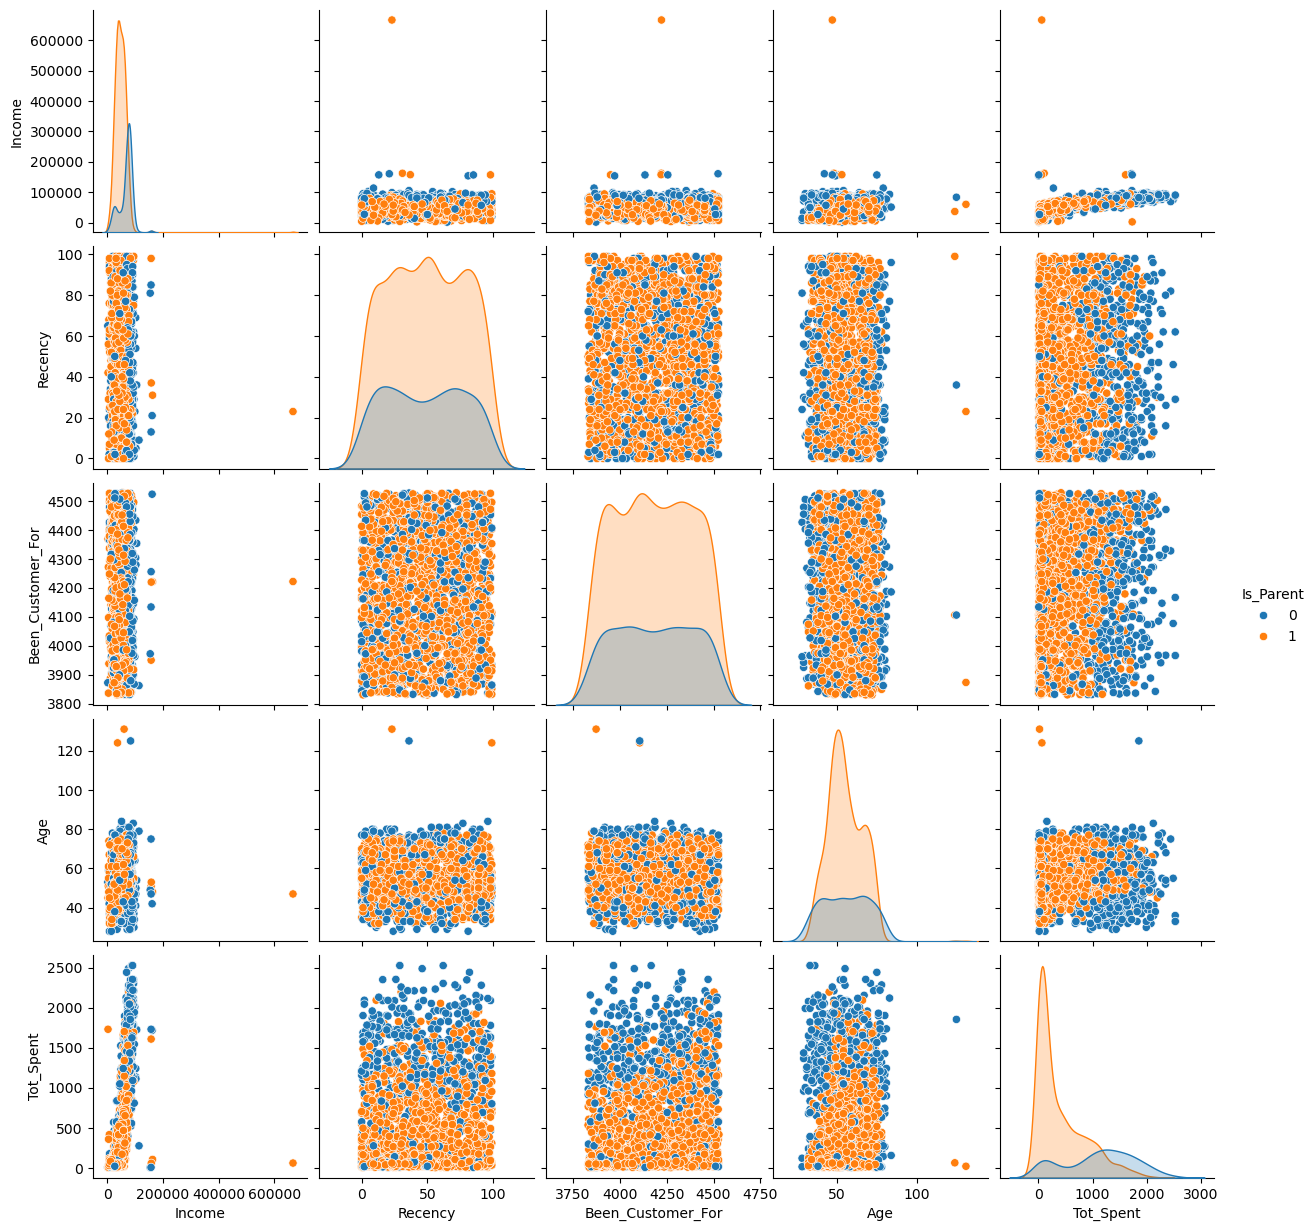

In [32]:
# Looking for outliers in some features
features_to_plot = ["Income", "Recency", "Been_Customer_For", "Age", "Tot_Spent", "Is_Parent"]

sns.pairplot(df[features_to_plot], hue='Is_Parent')

plt.show()

In [33]:
# Dropping the considered outliers
df = df[df['Age']<100]
df = df[df['Income']<400000]

In [34]:
df_sub_cat = df.drop(columns=['Education', 'Marital_Status'])

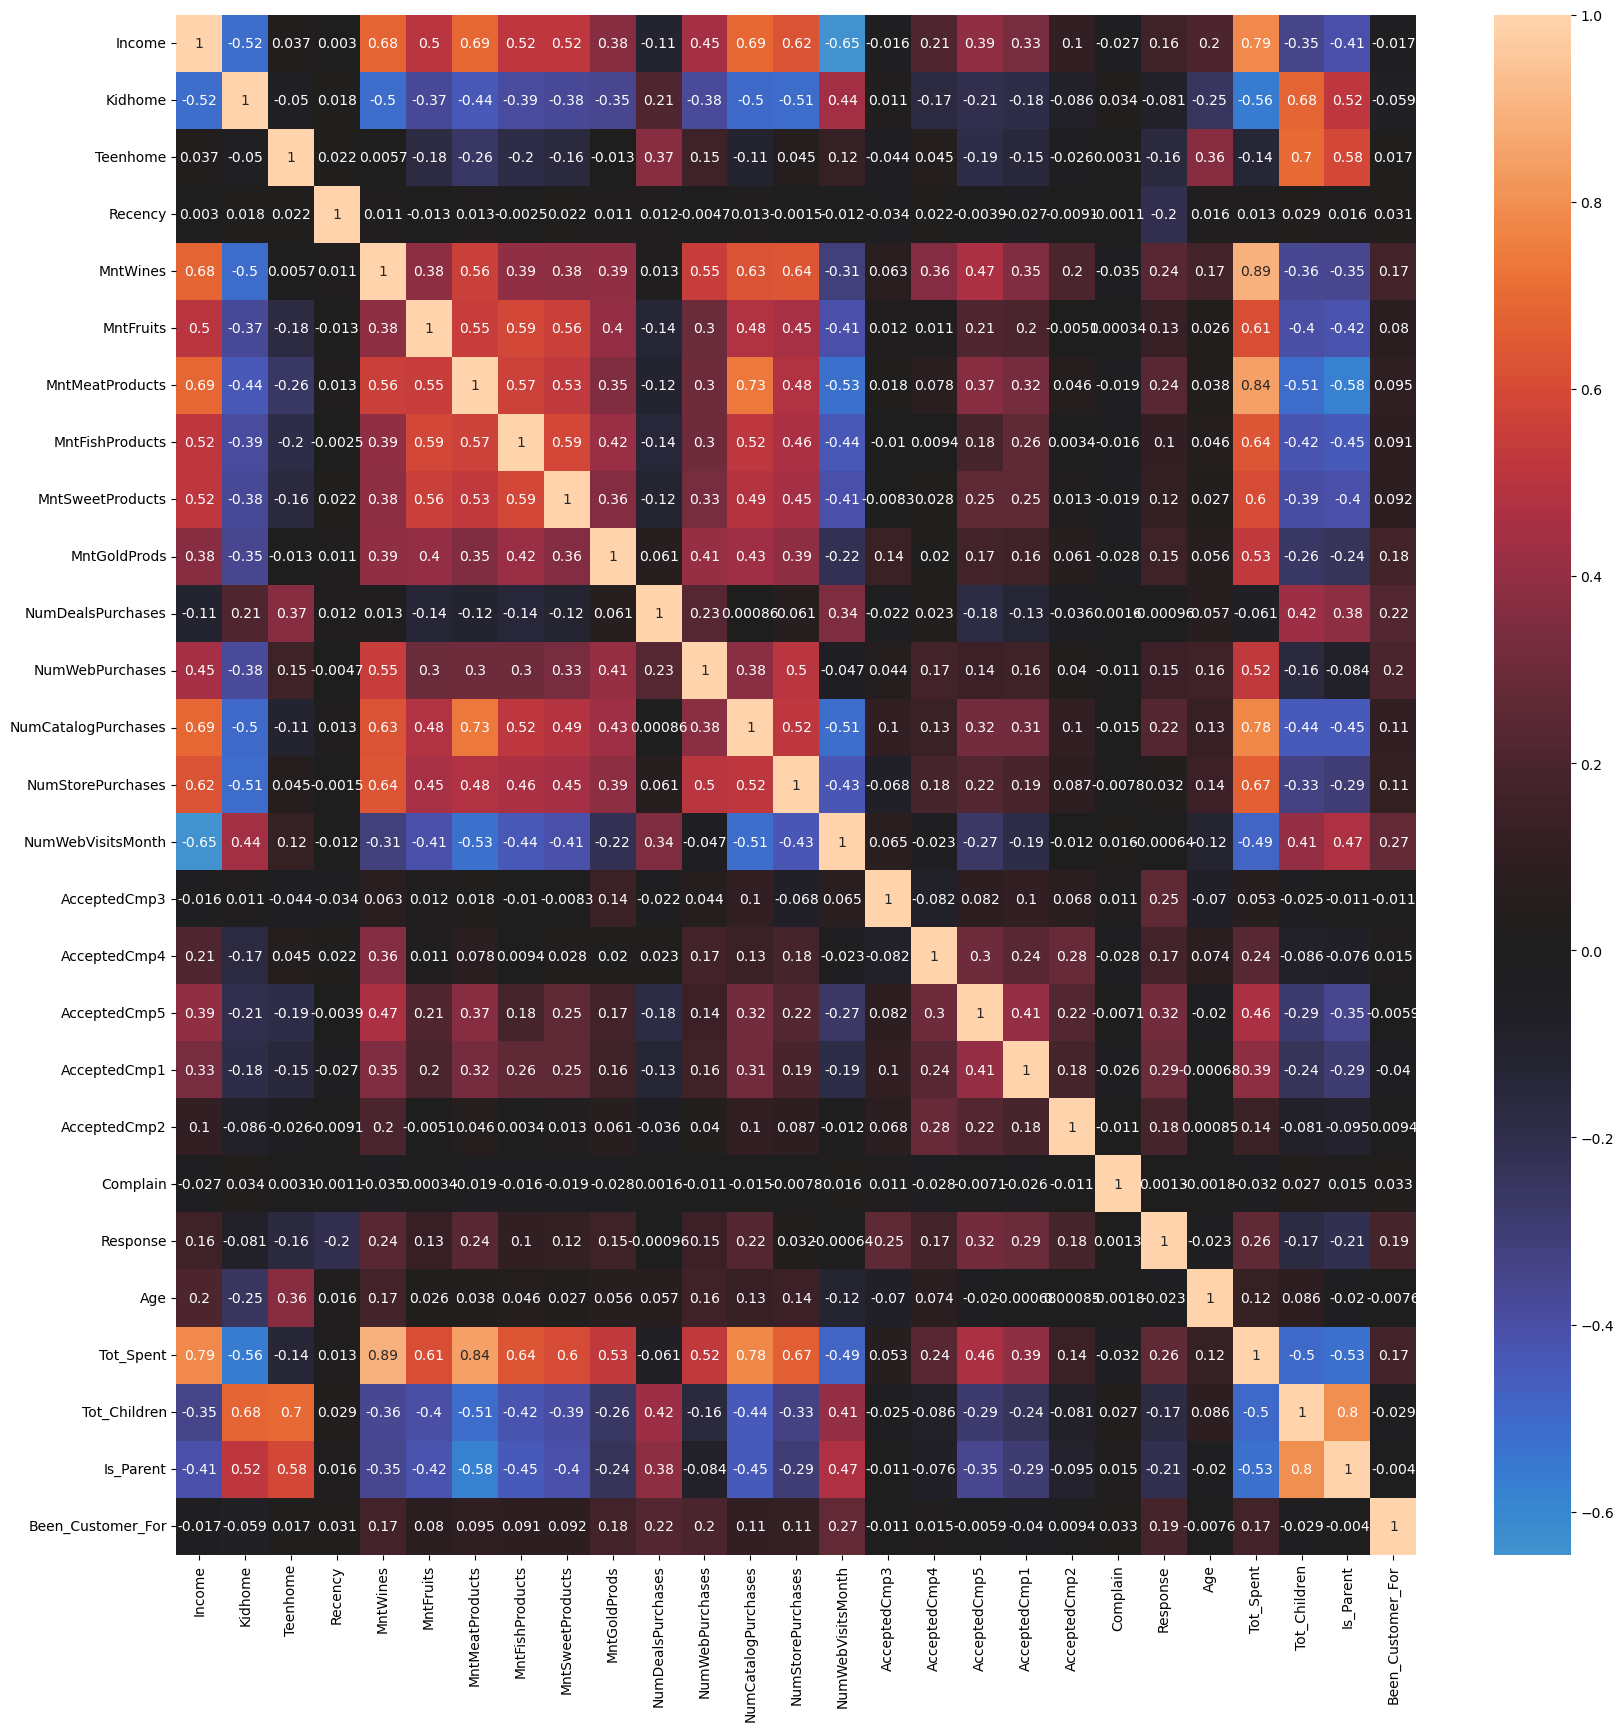

In [35]:
# Looking for correlation among features
correlation_matrix = df_sub_cat.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(correlation_matrix, annot=True, center=0)
plt.show()

In [36]:
# Reset index
df = df.reset_index(drop=True)

### Pre-processing

In [37]:
# Label encoding on 'Education'
education_levels = {'Basic': 0, '2n Cycle': 1, 'Graduation' : 2,'Master' : 3, 'PhD' : 4}
df['Education'] = df['Education'].map(education_levels)

# One-hot encoding on 'Marital_Status'
one_hot = pd.get_dummies(df['Marital_Status']).astype(int)
df = df.drop('Marital_Status', axis=1)
df = df.join(one_hot)

# I updated the features now that I have a one-hot encoding
updated_features = features.copy()
updated_features.remove('Marital_Status')

marital_status = ['Divorced', 'Married-Together', 'Single', 'Widow']
for i in range(len(marital_status)):
    updated_features.append(marital_status[i])

In [38]:
# I want to keep the dataset with only the features to work on
Xdf = df[updated_features].copy()

In [39]:
# Standardization of the data
std_scaler = StandardScaler()
std_scaler.fit(Xdf)
STD_data = std_scaler.transform(Xdf)
Xdf_std = pd.DataFrame(STD_data, columns = Xdf.columns)

### PCA: dimension reduction

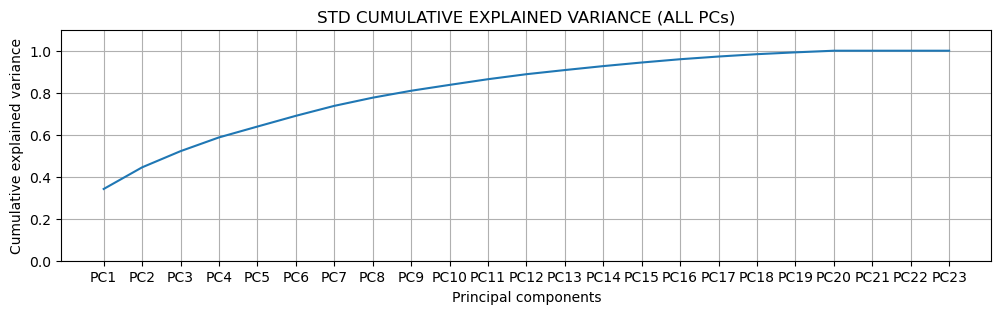

####### The std-explained variance:#######
[0.34161197 0.44467909 0.521743   0.58717414 0.63886547 0.68998038
 0.73739263 0.7764135  0.80936258 0.83728039 0.86436415 0.8881924
 0.90791616 0.92675847 0.94387433 0.95947752 0.97237545 0.98353015
 0.99226852 1.         1.         1.         1.        ]


In [40]:
# Applying PCA to the data to reduce dim
pca = PCA()
pca.fit(Xdf_std)

# Visualize the cumulative variance
plt.figure(figsize = (12, 3))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('STD CUMULATIVE EXPLAINED VARIANCE (ALL PCs)')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(pca.n_features_in_), 
           labels=[f'PC{i + 1}' for i in range(pca.n_features_in_)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()


print('####### The std-explained variance:#######')
print(np.cumsum(pca.explained_variance_ratio_))

In [41]:
# Getting the number of needed PCs
num_pcs = 0
pcs_needed = 0
THRESHOLD = 0.4

for i in range(pca.n_features_in_):
    pcs_needed += 1
    if (np.cumsum(pca.explained_variance_ratio_)[i]) >= THRESHOLD:
        break
print('We need:')
print('PCs with STD:', pcs_needed)

We need:
PCs with STD: 2


In [42]:
# Performing PCA with only the number that is needed
pca = PCA(n_components = pcs_needed)
pca.fit(Xdf_std)

# We get the records in the PC coordinates (transform)
PCA_df = pd.DataFrame(pca.transform(Xdf_std), columns=(["PC1","PC2"]))

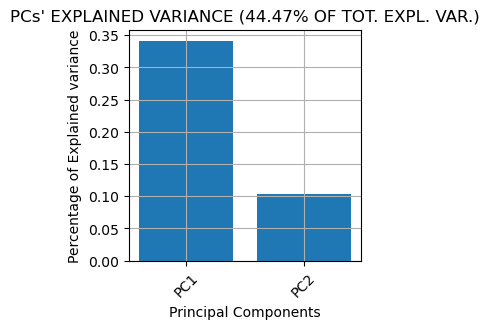

First PC explains: 0.34161197% var 
Second PC explains: 0.10306712% var 


In [43]:
# Total explained variance rounded to 2 decimals
round_expl_var_ratio_std = np.round(pca.explained_variance_ratio_.sum()*100, decimals=2)

# Plot of the explained variance by the PCs
plt.figure(figsize=(3, 3))
plt.bar(range(1, pcs_needed+1), pca.explained_variance_ratio_) 
plt.title(f"PCs' EXPLAINED VARIANCE ({round_expl_var_ratio_std}% OF TOT. EXPL. VAR.)")
plt.xticks(ticks=np.arange(1, pcs_needed+1), 
           labels=[f'PC{i}' for i in range(1, pcs_needed+1)],
           rotation=45)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained variance')
plt.grid()
plt.show()

print("First PC explains: 0.34161197% var \nSecond PC explains: 0.10306712% var ")

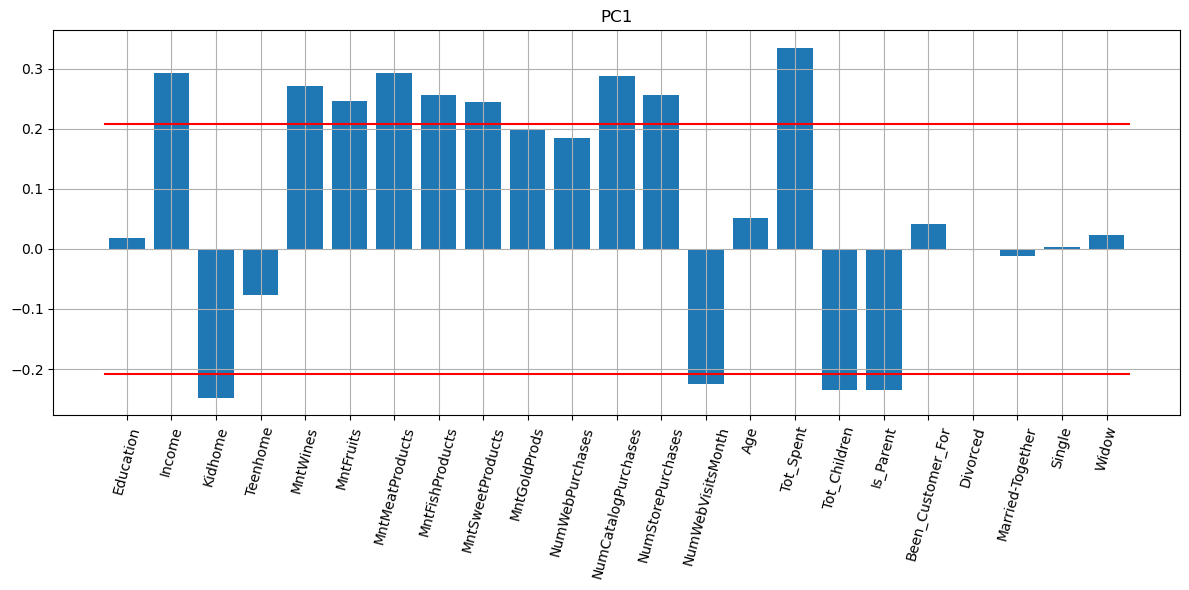

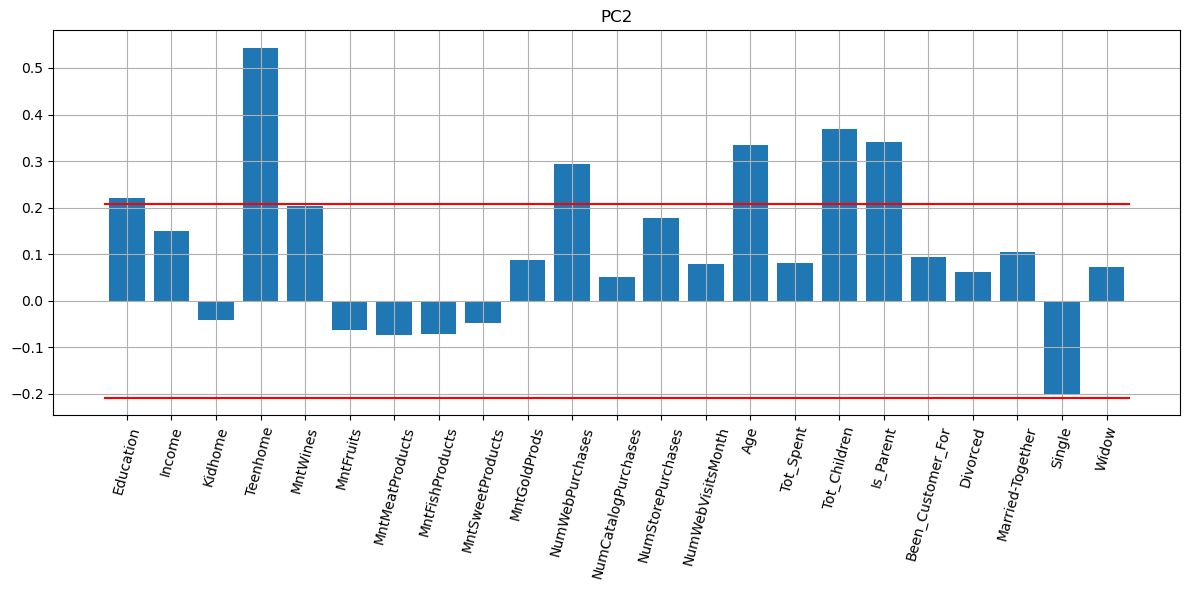


****************** PC1 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'NumCatalogPurchases', 'NumStorePurchases', 'Tot_Spent']

HIGH-VALUED NEGATIVE COMPONENTS: ['Kidhome', 'NumWebVisitsMonth', 'Tot_Children', 'Is_Parent']
*********************************************


****************** PC2 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Education', 'Teenhome', 'NumWebPurchases', 'Age', 'Tot_Children', 'Is_Parent']

HIGH-VALUED NEGATIVE COMPONENTS: []
*********************************************



In [44]:
### Interpretation of these PCs ###

# Define the threshold eps
eps = np.sqrt(1 / pca.n_features_in_)

# MAKE THE STD-VARPLOT W.R.T PC1
plt.figure(figsize=(12, 6))
plt.bar(np.arange(pca.n_features_in_), pca.components_[0, :]) 
# --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
plt.plot([-0.5, pca.n_features_in_ - 0.5], [eps, eps], 'red')
plt.plot([-0.5, pca.n_features_in_ - 0.5], [-eps, -eps], 'red')
# ------------------------------------------------------------------
plt.xticks(ticks=np.arange(pca.n_features_in_),
            labels=updated_features,
            rotation=75)
plt.title('PC1')
#plt.legend(type_colors_legend, [k for k in type_colors.keys()])
plt.grid()
plt.tight_layout()
plt.show()


# MAKE THE STD-VARPLOT W.R.T PC2
plt.figure(figsize=(12, 6))
plt.bar(np.arange(pca.n_features_in_), pca.components_[1, :]) 
# --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
plt.plot([-0.5, pca.n_features_in_ - 0.5], [eps, eps], 'red')
plt.plot([-0.5, pca.n_features_in_ - 0.5], [-eps, -eps], 'red')
# ------------------------------------------------------------------
plt.xticks(ticks=np.arange(pca.n_features_in_),
            labels=updated_features,
            rotation=75)
plt.title('PC2')
#plt.legend(type_colors_legend, [k for k in type_colors.keys()])
plt.grid()
plt.tight_layout()
plt.show()

## SELECTION OF THE FEATURES WITH GREATER CONTRIBUT
for ii in range(pcs_needed):
    std_pos_PCii = np.argwhere(pca.components_[ii, :] >= eps).flatten()
    std_neg_PCii = np.argwhere(pca.components_[ii, :] <= -eps).flatten()
    
    std_pos_features_PCii = [updated_features[i] for i in std_pos_PCii]
    std_neg_features_PCii = [updated_features[i] for i in std_neg_PCii]
    
    print('')
    print(f'****************** PC{ii+1} **********************')
    print(f'HIGH-VALUED POSITIVE COMPONENTS: {std_pos_features_PCii}')
    print('')
    print(f'HIGH-VALUED NEGATIVE COMPONENTS: {std_neg_features_PCii}')
    print('*********************************************')
    print('')

In [45]:
# Names assigned to the PCs
pc_names = ['Tot Children at Home and Web Visits (-) vs Higher income and more spendings (+)', 
           'Singles  (-) vs Educated, older and parents with more kids  (+)' 
           ]

### Customer clustering

Clustering perfomed using Kmeans and used the silhouette score to select the best number of clusters

In [46]:
random_state = 27

In [47]:
# Lists to store the result to be able to make some comparison later
km_list = []
silcoeff_list = []
k_list = list(range(3, 10))

# Measuring K-means and the silouette coeff
for i in range(len(k_list)):
    print(f'****************** START k-MEANS WITH k={k_list[i]} ******************')
    print('Computing...')
    km_list.append(KMeans(n_clusters=k_list[i], n_init=10, random_state=random_state))
    km = km_list[i]
    km.fit(PCA_df)
    silcoeff_list.append(silhouette_score(PCA_df, km.labels_))
    print(f'****************** END k-MEANS WITH k={k_list[i]} ******************')
    print('')

# Best value of k and silouette coeff
i_best = np.argmax(silcoeff_list)
k = k_list[i_best]
km = km_list[i_best]

# Visualizing the result
print('')
print('')
print('****************** RESULTS OF THE SEARCH... ******************')
print(f'BEST SILHOUETTE SCORE: {np.max(silcoeff_list)} --> k = {k}') 
print('**************************************************************')

****************** START k-MEANS WITH k=3 ******************
Computing...


c:\Users\Bobo\miniconda3\envs\minimal_ds\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Bobo\miniconda3\envs\minimal_ds\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Bobo\miniconda3\envs\minimal_ds\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Bobo\miniconda3\envs\minimal_ds\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, 

****************** END k-MEANS WITH k=3 ******************

****************** START k-MEANS WITH k=4 ******************
Computing...
****************** END k-MEANS WITH k=4 ******************

****************** START k-MEANS WITH k=5 ******************
Computing...


c:\Users\Bobo\miniconda3\envs\minimal_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\Bobo\miniconda3\envs\minimal_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


****************** END k-MEANS WITH k=5 ******************

****************** START k-MEANS WITH k=6 ******************
Computing...


c:\Users\Bobo\miniconda3\envs\minimal_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


****************** END k-MEANS WITH k=6 ******************

****************** START k-MEANS WITH k=7 ******************
Computing...
****************** END k-MEANS WITH k=7 ******************

****************** START k-MEANS WITH k=8 ******************
Computing...


c:\Users\Bobo\miniconda3\envs\minimal_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\Bobo\miniconda3\envs\minimal_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


****************** END k-MEANS WITH k=8 ******************

****************** START k-MEANS WITH k=9 ******************
Computing...


c:\Users\Bobo\miniconda3\envs\minimal_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


****************** END k-MEANS WITH k=9 ******************



****************** RESULTS OF THE SEARCH... ******************
BEST SILHOUETTE SCORE: 0.49106991774030456 --> k = 3
**************************************************************


In [48]:
# Predict the clusters with best model hyperparameters
model = KMeans(n_clusters=3, n_init=10, random_state=random_state)
customers_clusters = model.fit_predict(PCA_df)

# Add clusters to both datasets
PCA_df['Clusters'] = customers_clusters
df['Clusters'] = customers_clusters

c:\Users\Bobo\miniconda3\envs\minimal_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


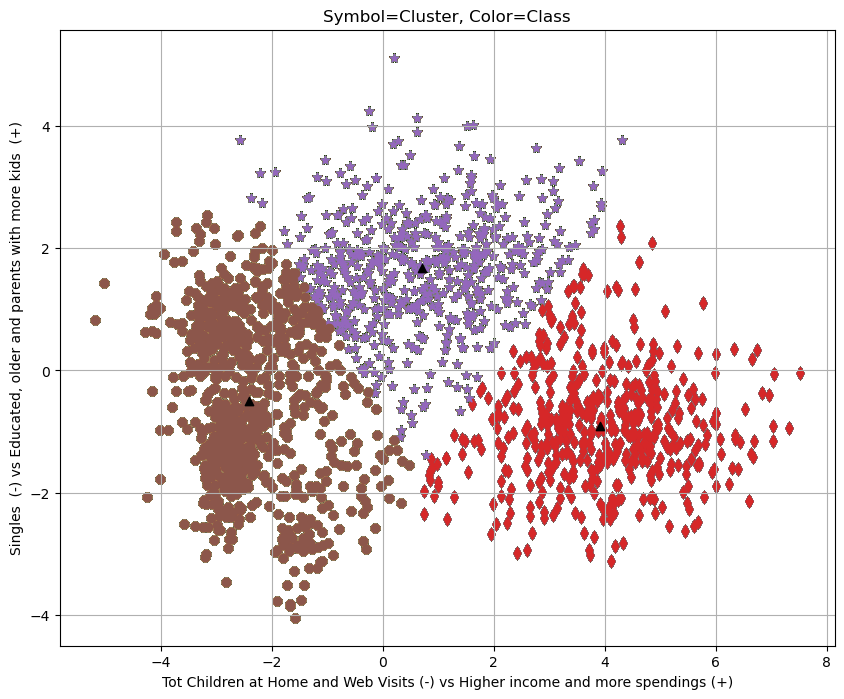

In [49]:
# Plotting the clusters
markers_dict = {0: '*', 1: 'o', 2: 'd'}
colors = cm.tab20.colors

plt.figure(figsize=(10,8))

for lab in model.labels_:
    plt.scatter(PCA_df[PCA_df['Clusters']==lab]['PC1'], PCA_df[PCA_df['Clusters']==lab]['PC2'], marker=markers_dict[lab])

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='black', marker='^') # plot the centroid

plt.title('Symbol=Cluster, Color=Class')
plt.xlabel(pc_names[0])
plt.ylabel(pc_names[1])
plt.grid()
plt.show()

This helps in profiling each customer cluster:
- Cluster 0 (Purple):
    - Are older
    - Are parents
    - Higher education
    - Medium to high income and spenders
- Cluster 1 (Brown):
    - Most of them are single
    - Younger
    - Have children at home
    - Don't have much free time to go to the store and prefer to go on the website
- Cluster 2 (Red):
    - Most of them are single
    - Younger
    - High income
    - High spendings

### Evaluating

Here we study the patterns that we get to profile the customers

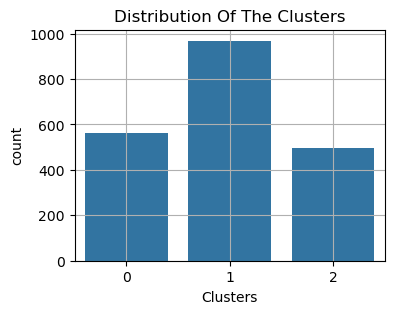

In [50]:
# Plotting numbers of elements per clusters
plt.figure(figsize=(4,3))
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.grid()
plt.show()

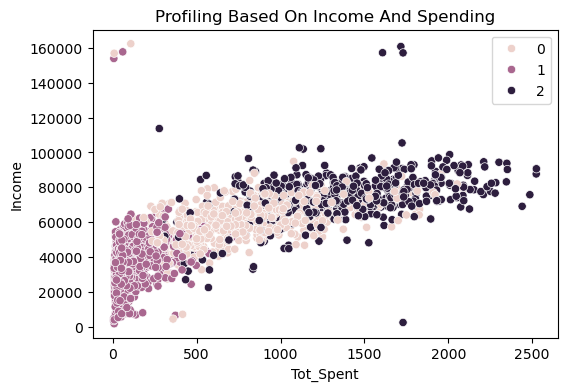

In [51]:
# Plotting how groups are distribuited based on spending and income
plt.figure(figsize=(6,4))
scatt = sns.scatterplot(data=df, x=df["Tot_Spent"], y=df["Income"], hue=df["Clusters"])
scatt.set_title("Profiling Based On Income And Spending")
plt.legend()
plt.show()

Here we have:
- group 1 = low to medium spenders with low income
- group 2 = medium spenders with low to medium income
- group 3 = high spenders with medium to high income


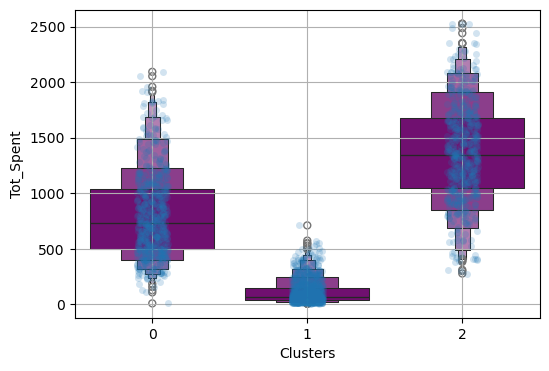

In [52]:
# Plotting how much each group spend in general
plt.figure(figsize=(6,4))
strplt = sns.stripplot(x=df["Clusters"], y=df["Tot_Spent"], alpha=0.2 )
boxplt = sns.boxenplot(x=df["Clusters"], y=df["Tot_Spent"], color='purple')
plt.grid()
plt.show()

Here we notice that cluster 0 and 2 are the one with biggest variance and spending habings.

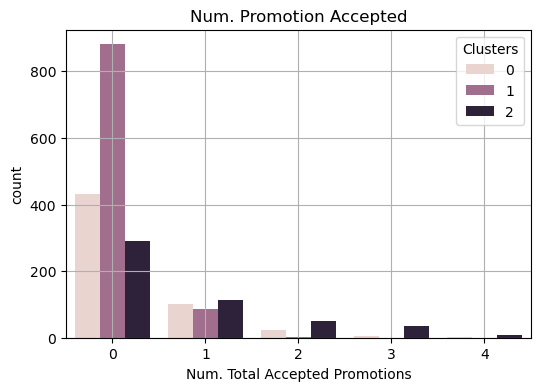

In [53]:
# Analyzing what each cluster spend on to do target marketing

# Creating a feature to get a sum of accepted promotions 
df["Total_Promos_Accepted"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"]

# Plotting the count of total promotion campaign accepted.
plt.figure(figsize=(6,4))
cnt = sns.countplot(x=df["Total_Promos_Accepted"], hue=df["Clusters"])
cnt.set_title("Num. Promotion Accepted")
cnt.set_xlabel("Num. Total Accepted Promotions")
plt.grid()
plt.show()

some well placed promotions would boost the sales.

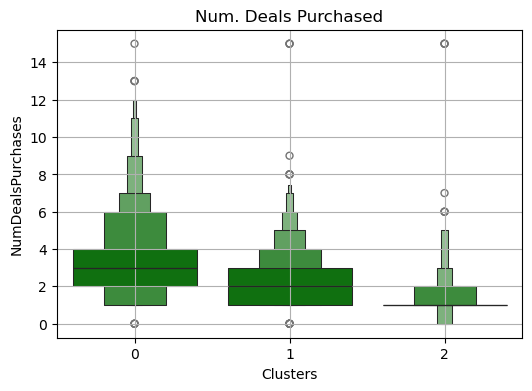

In [54]:
#Plotting the number of deals purchased
plt.figure(figsize=(6,4))
boxplt = sns.boxenplot(y=df["NumDealsPurchases"], x=df["Clusters"], color='green')
boxplt.set_title("Num. Deals Purchased")
plt.grid()
plt.show()

For deals we notice that each group is buying at least 1. Cluster 2 is not buying that much deals, since they are a lot it would make sense to do some promotions for them.

In [58]:
sub_PCA_df = PCA_df[['PC1', 'PC2']]

In [61]:
tot_df_1 = pd.concat((df, sub_PCA_df), axis=1)

In [63]:
tot_df_1

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tot_Spent,Tot_Children,Is_Parent,Been_Customer_For,Divorced,Married-Together,Single,Widow,Clusters,Total_Promos_Accepted,PC1,PC2
0,2,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67,1617,0,0,4493,0,0,1,0,2,0,4.704223,-1.173009
1,2,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,70,27,2,1,3943,0,0,1,0,1,0,-2.886987,0.066840
2,2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,59,776,0,0,4142,0,1,0,0,2,0,2.438861,-0.638078
3,2,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,40,53,1,1,3969,0,1,0,0,1,0,-2.723077,-1.491135
4,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,43,422,1,1,3991,0,1,0,0,1,0,-0.440782,-0.287285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,2,26816.0,0,0,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,0,38,22,0,0,4511,0,0,1,0,1,0,-1.410665,-3.502828
2022,2,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,57,1341,1,1,4211,0,1,0,0,0,0,2.532005,1.903500
2023,2,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,43,1241,0,0,3985,1,0,0,0,2,1,2.171127,-1.276099
2024,3,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,68,843,1,1,3986,0,1,0,0,0,0,1.720433,1.877937


In [64]:
tot_df_1.to_csv("customer_segmentation.csv", index=False)